In [2]:
import mne
import numpy as np
import mne
import numpy as np
import os
import pandas as pd
from pathlib import Path

# Import the FOOOF object
from fooof import FOOOF
from fooof import FOOOFGroup

# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data

import warnings
warnings.filterwarnings("ignore")

# Use neurodsp for convenience
from neurodsp.plts import plot_time_series, plot_power_spectra
from neurodsp.spectral import compute_spectrum

# KNEE freqs
from fooof.utils.params import compute_knee_frequency

# Plotting functions
import matplotlib.pyplot as plt
from spiketools.plts.utils import make_axes
import matplotlib.pyplot as plt
import seaborn as sns
import imagesc as imagesc

In [3]:
# Import custom project code
import sys
sys.path.append("/home/b1044271/Columbia/Aperiodic_sleep/helpers")
from utils import check_distribution, perform_correlation

In [39]:
f_min = 1
fs    = 200

SETTINGS_W  = { 'method' : 'welch', 'average' : 'mean', 'fmin' :f_min}
SETTINGS_F1 = {'max_n_peaks':8, 'aperiodic_mode':'knee'}
SETTINGS_F2 = {'max_n_peaks':8, 'aperiodic_mode':'fixed'}

In [40]:
# Time parametres for broadband analysis
Time_segments = [ 5,  10, 15, 20] # seconds
f_max = [30, 45 , 75, 90] # Hz


In [41]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')

# Set dataset
dataset = 'Wakefulness_AllRegions'

# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

W_Kn  = np.zeros([len(regions)-4,16])*np.nan
W_Exp = np.zeros([len(regions)-4,16])*np.nan
W_R2 = np.zeros([len(regions)-4,16])*np.nan
W_ExpF = np.zeros([len(regions)-4,16])*np.nan
W_R2F = np.zeros([len(regions)-4,16])*np.nan

N2_Kn  = np.zeros([len(regions)-4,16])*np.nan
N2_Exp = np.zeros([len(regions)-4,16])*np.nan
N2_R2 = np.zeros([len(regions)-4,16])*np.nan
N2_ExpF = np.zeros([len(regions)-4,16])*np.nan
N2_R2F = np.zeros([len(regions)-4,16])*np.nan

N3_Kn  = np.zeros([len(regions)-4,16])*np.nan
N3_Exp = np.zeros([len(regions)-4,16])*np.nan
N3_R2 = np.zeros([len(regions)-4,16])*np.nan
N3_ExpF = np.zeros([len(regions)-4,16])*np.nan
N3_R2F = np.zeros([len(regions)-4,16])*np.nan

R_Kn  = np.zeros([len(regions)-4,16])*np.nan
R_Exp = np.zeros([len(regions)-4,16])*np.nan
R_R2 = np.zeros([len(regions)-4,16])*np.nan
R_ExpF = np.zeros([len(regions)-4,16])*np.nan
R_R2F = np.zeros([len(regions)-4,16])*np.nan


# WAKE

In [42]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'Wakefulness_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

In [43]:
i =0 
for C, V in enumerate(regions):
    
    # IGNORE NON-CORTICAL AREAS
    if C == 0 or C== 8 or C==10 or C==35:
        continue
    
    EEG = mne.io.read_raw_edf(data_path / dataset / V)

    ii=0    
    for t in Time_segments:
        for f in f_max:

            EEG_psd = EEG.compute_psd(**SETTINGS_W, fmax=f, n_fft=fs*t, n_overlap=fs*t*0.5)
    
            fm1 = FOOOF(**SETTINGS_F1)
            fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
    
            fm2 = FOOOF(**SETTINGS_F2)
            fm2.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
            
            # parameters exctract
            if fm1.has_model:
                W_Kn[i,ii]   = fm1.get_params('aperiodic_params','knee')
                W_Exp[i,ii]  = fm1.get_params('aperiodic_params','exponent')
                W_R2[i,ii]   = fm1.get_params('r_squared')    
            else:
                W_Kn[i,ii]   = np.nan
                W_Exp[i,ii]  = np.nan
                W_R2[i,ii]   = np.nan  
            
            if fm2.has_model:
                W_ExpF[i,ii] = fm2.get_params('aperiodic_params','exponent')
                W_R2F[i,ii]  = fm2.get_params('r_squared')
            else:
                W_ExpF[i,ii] = np.nan
                W_R2F[i,ii]  = np.nan

            ii = ii +1
    i = i+1


Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Angular gyrus_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Anterior cingulate_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.0

Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Medial frontal cortex_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Medial segment of precentral gyrus_W.edf...
EDF file detected
Setting channel info structure..

Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Posterior cingulate_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extr

Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Triangular part of inferior frontal gyrus_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window 

# N2

In [44]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'N2_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

In [45]:
i =0 
for C, V in enumerate(regions):
    
    # IGNORE NON-CORTICAL AREAS
    if C == 0 or C== 8 or C==10 or C==35:
        continue
        
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    
    ii=0    
    for t in Time_segments:
        for f in f_max:

            EEG_psd = EEG.compute_psd(**SETTINGS_W, fmax=f, n_fft=fs*t, n_overlap=fs*t*0.5)

            fm1 = FOOOF(**SETTINGS_F1)
            fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
                
            fm2 = FOOOF(**SETTINGS_F2)
            fm2.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
            
            # parameters exctract
            if fm1.has_model:
                N2_Kn[i,ii]   = fm1.get_params('aperiodic_params','knee')
                N2_Exp[i,ii]  = fm1.get_params('aperiodic_params','exponent')
                N2_R2[i,ii]   = fm1.get_params('r_squared')
            else:
                N2_Kn[i,ii]   = np.nan
                N2_Exp[i,ii]  = np.nan
                N2_R2[i,ii]   = np.nan
                
            if fm2.has_model:
                N2_ExpF[i,ii] = fm2.get_params('aperiodic_params','exponent')
                N2_R2F[i,ii]  = fm2.get_params('r_squared')
            else:
                N2_ExpF[i,ii] = np.nan
                N2_R2F[i,ii]  = np.nan
                
            ii = ii +1
    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Angular gyrus_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Anterior cingulate_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective w

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Medial segment of precentral gyrus_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Posterior insula_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effecti

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)


# N3

In [46]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'N3_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

In [47]:
i =0 
for C, V in enumerate(regions):
    
    # IGNORE NON-CORTICAL AREAS
    if C == 0 or C== 8 or C==10 or C==35:
        continue
    
    # LOAD DATA
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    
    ii=0    
    for t in Time_segments:
        for f in f_max:

            EEG_psd = EEG.compute_psd(**SETTINGS_W, fmax=f, n_fft=fs*t, n_overlap=fs*t*0.5)
    
            fm1 = FOOOF(**SETTINGS_F1)
            fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
                
            fm2 = FOOOF(**SETTINGS_F2)
            fm2.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
            
            #paramters
            if fm1.has_model:
                N3_Kn[i,ii]   = fm1.get_params('aperiodic_params','knee')
                N3_Exp[i,ii]  = fm1.get_params('aperiodic_params','exponent')
                N3_R2[i,ii]   = fm1.get_params('r_squared')
            else:
                N3_Kn[i,ii]   = np.nan
                N3_Exp[i,ii]  = np.nan
                N3_R2[i,ii]   = np.nan
                
            if fm2.has_model:
                N3_ExpF[i,ii] = fm2.get_params('aperiodic_params','exponent')
                N3_R2F[i,ii]  = fm2.get_params('r_squared')
            else:
                N3_ExpF[i,ii] = np.nan
                N3_R2F[i,ii]  = np.nan

            ii = ii +1
    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Angular gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Anterior cingulate_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective w

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Medial frontal cortex_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Medial segment of precentral gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size

Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Posterior cingulate_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Posterior insula_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effect

Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Triangular part of inferior frontal gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)


# R

In [48]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'REM_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

In [49]:
i =0 
for C, V in enumerate(regions):
    
    # IGNORE NON-CORTICAL AREAS
    if C == 0 or C== 8 or C==10 or C==35:
        continue
    
    EEG = mne.io.read_raw_edf(data_path / dataset / V)

    ii=0    
    for t in Time_segments:
        for f in f_max:

            EEG_psd = EEG.compute_psd(**SETTINGS_W, fmax=f, n_fft=fs*t, n_overlap=fs*t*0.5)
    
            fm1 = FOOOF(**SETTINGS_F1)
            fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
                 
            fm2 = FOOOF(**SETTINGS_F2)
            fm2.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
            
            # parameters exctract
            if fm1.has_model:
                R_Kn[i,ii]   = fm1.get_params('aperiodic_params','knee')
                R_Exp[i,ii]  = fm1.get_params('aperiodic_params','exponent')
                R_R2[i,ii]   = fm1.get_params('r_squared')
            else:
                R_Kn[i,ii]   = np.nan
                R_Exp[i,ii]  = np.nan
                R_R2[i,ii]   = np.nan
                
            if fm2.has_model:
                R_ExpF[i,ii] = fm2.get_params('aperiodic_params','exponent')
                R_R2F[i,ii]  = fm2.get_params('r_squared')
            else:
                R_ExpF[i,ii] = np.nan
                R_R2F[i,ii]  = np.nan

            ii = ii +1
    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Angular gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Anterior cingulate_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Medial frontal cortex_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Medial segment of precentral gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window si

Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Posterior cingulate_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Posterior insula_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Eff

Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Triangular part of inferior frontal gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)


## PLOT R2 of Knee model

In [51]:
# now we can mean over regions 
R2_W = np.nanmean(W_R2,0)
R2_N2 = np.nanmean(N2_R2,0)
R2_N3 = np.nanmean(N3_R2,0)
R2_R = np.nanmean(R_R2,0)

R2_all = np.nanmean([R2_W , R2_N2 , R2_N3 , R2_R], 0)

R2_all_final = np.reshape(R2_all, (4, 4))


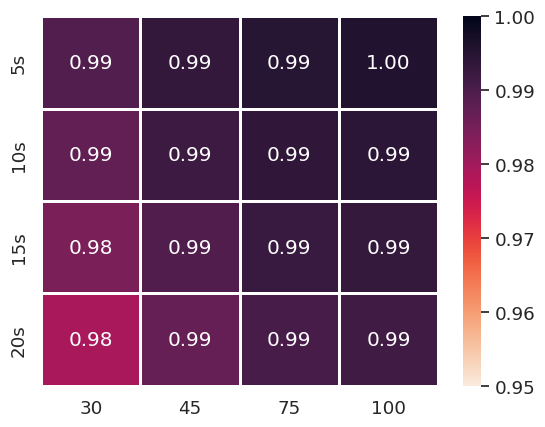

In [262]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(R2_all_final,columns=['30', '45','75','100'], index=['5s','10s','15s', '20s'])
seaborn.heatmap(data_s,  annot=True, cmap='rocket_r', fmt='.2f', linewidths=1, vmin=0.95, vmax=1.0)
plt.savefig("Sensitivity_Broadband_Knee_R2.svg")


In [52]:
# now we can mean over regions 
E_W = np.nanmean(W_Exp,0)
E_N2 = np.nanmean(N2_Exp,0)
E_N3 = np.nanmean(N3_Exp,0)
E_R = np.nanmean(R_Exp,0)

E_all = np.nanmean([E_W , E_N2 , E_N3 , E_R], 0)

E_all_final = np.reshape(E_all, (4, 4))


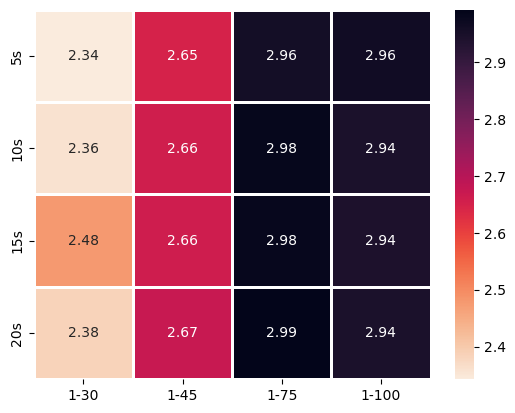

In [55]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(E_all_final,columns=['1-30', '1-45','1-75','1-100'], index=['5s','10s','15s', '20s'])
seaborn.heatmap(data_s,  annot=True, cmap='rocket_r', fmt='.2f', linewidths=1)

plt.savefig('/home/b1044271/Columbia/Plots/NOV23/Sensitivity_Broad_Knee_exponent.svg')

# Narrow bands


In [5]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')

# Set dataset
dataset = 'Wakefulness_AllRegions'

# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

W_KnN  = np.zeros([len(regions)-4,16])*np.nan
W_ExpN = np.zeros([len(regions)-4,16])*np.nan
W_R2N = np.zeros([len(regions)-4,16])*np.nan
W_ExpFN = np.zeros([len(regions)-4,16])*np.nan
W_R2FN = np.zeros([len(regions)-4,16])*np.nan

N2_KnN  = np.zeros([len(regions)-4,16])*np.nan
N2_ExpN = np.zeros([len(regions)-4,16])*np.nan
N2_R2N = np.zeros([len(regions)-4,16])*np.nan
N2_ExpFN = np.zeros([len(regions)-4,16])*np.nan
N2_R2FN = np.zeros([len(regions)-4,16])*np.nan

N3_KnN  = np.zeros([len(regions)-4,16])*np.nan
N3_ExpN = np.zeros([len(regions)-4,16])*np.nan
N3_R2N = np.zeros([len(regions)-4,16])*np.nan
N3_ExpFN = np.zeros([len(regions)-4,16])*np.nan
N3_R2FN = np.zeros([len(regions)-4,16])*np.nan

R_KnN  = np.zeros([len(regions)-4,16])*np.nan
R_ExpN = np.zeros([len(regions)-4,16])*np.nan
R_R2N = np.zeros([len(regions)-4,16])*np.nan
R_ExpFN = np.zeros([len(regions)-4,16])*np.nan
R_R2FN = np.zeros([len(regions)-4,16])*np.nan

In [8]:
fs    = 200

SETTINGS_W  = { 'method' : 'welch', 'average' : 'mean' }
SETTINGS_F1 = {'max_n_peaks':8, 'aperiodic_mode':'knee'}
#SETTINGS_F2 = {'max_n_peaks':8, 'aperiodic_mode':'fixed'}

In [9]:
# Time parametres for broadband analysis
Time_segments = [ 5,  10, 15, 20] # seconds
f_min = [30, 30 , 1, 10] # Hz
f_max = [45, 50 , 10, 30] # Hz

In [10]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'Wakefulness_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

i =0 
for C, V in enumerate(regions):
    
    # IGNORE NON-CORTICAL AREAS
    if C == 0 or C== 8 or C==10 or C==35:
        continue
    
    EEG = mne.io.read_raw_edf(data_path / dataset / V)

    ii=0    
    for t in Time_segments:
        for x in np.arange(4):

            EEG_psd = EEG.compute_psd(**SETTINGS_W, fmin=f_min[x], fmax=f_max[x], n_fft=fs*t, n_overlap=fs*t*0.5)
    
            fm1 = FOOOF(**SETTINGS_F1)
            fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
    
            #fm2 = FOOOF(**SETTINGS_F2)
            #fm2.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
            
            # parameters exctract
            if fm1.has_model:
                W_KnN[i,ii]   = fm1.get_params('aperiodic_params','knee')
                W_ExpN[i,ii]  = fm1.get_params('aperiodic_params','exponent')
                W_R2N[i,ii]   = fm1.get_params('r_squared')    
            else:
                W_KnN[i,ii]   = np.nan
                W_ExpN[i,ii]  = np.nan
                W_R2N[i,ii]   = np.nan  
            
            #if fm2.has_model:
            #    W_ExpFN[i,ii] = fm2.get_params('aperiodic_params','exponent')
            #    W_R2FN[i,ii]  = fm2.get_params('r_squared')
            #else:
            #    W_ExpFN[i,ii] = np.nan
             #   W_R2FN[i,ii]  = np.nan

            ii = ii +1
    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Angular gyrus_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Anterior cingulate_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.0

Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Medial frontal cortex_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Medial segment of precentral gyrus_W.edf...
EDF file detected
Setting channel info structure..

Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Posterior cingulate_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1

Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Triangular part of inferior frontal gyrus_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window 

# N2

In [11]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'N2_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

#START
i =0 
for C, V in enumerate(regions):
    
    # IGNORE NON-CORTICAL AREAS
    if C == 0 or C== 8 or C==10 or C==35:
        continue
        
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    
    ii=0    
    for t in Time_segments:
        for x in np.arange(4):

            EEG_psd = EEG.compute_psd(**SETTINGS_W, fmin = f_min[x], fmax=f_max[x], n_fft=fs*t, n_overlap=fs*t*0.5)

            fm1 = FOOOF(**SETTINGS_F1)
            fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
                
            #fm2 = FOOOF(**SETTINGS_F2)
            #fm2.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
            
            # parameters exctract
            if fm1.has_model:
                N2_KnN[i,ii]   = fm1.get_params('aperiodic_params','knee')
                N2_ExpN[i,ii]  = fm1.get_params('aperiodic_params','exponent')
                N2_R2N[i,ii]   = fm1.get_params('r_squared')
            else:
                N2_KnN[i,ii]   = np.nan
                N2_ExpN[i,ii]  = np.nan
                N2_R2N[i,ii]   = np.nan
                
            #if fm2.has_model:
            #    N2_ExpFN[i,ii] = fm2.get_params('aperiodic_params','exponent')
            #    N2_R2FN[i,ii]  = fm2.get_params('r_squared')
            #else:
           #     N2_ExpFN[i,ii] = np.nan
            #    N2_R2FN[i,ii]  = np.nan
                
            ii = ii +1
    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Angular gyrus_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Anterior cingulate_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective w

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Medial segment of precentral gyrus_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Posterior insula_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effecti

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)


# N3

In [12]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'N3_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

i =0 
for C, V in enumerate(regions):
    
    # IGNORE NON-CORTICAL AREAS
    if C == 0 or C== 8 or C==10 or C==35:
        continue
    
    # LOAD DATA
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    
    ii=0    
    for t in Time_segments:
        for x in np.arange(4):

            EEG_psd = EEG.compute_psd(**SETTINGS_W, fmin= f_min[x], fmax=f_max[x], n_fft=fs*t, n_overlap=fs*t*0.5)
    
            fm1 = FOOOF(**SETTINGS_F1)
            fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
                
            #fm2 = FOOOF(**SETTINGS_F2)
            #fm2.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
            
            #paramters
            if fm1.has_model:
                N3_KnN[i,ii]   = fm1.get_params('aperiodic_params','knee')
                N3_ExpN[i,ii]  = fm1.get_params('aperiodic_params','exponent')
                N3_R2N[i,ii]   = fm1.get_params('r_squared')
            else:
                N3_KnN[i,ii]   = np.nan
                N3_ExpN[i,ii]  = np.nan
                N3_R2N[i,ii]   = np.nan
                
            #if fm2.has_model:
            #    N3_ExpFN[i,ii] = fm2.get_params('aperiodic_params','exponent')
            #    N3_R2FN[i,ii]  = fm2.get_params('r_squared')
            #else:
            #    N3_ExpFN[i,ii] = np.nan
            #    N3_R2FN[i,ii]  = np.nan

            ii = ii +1
    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Angular gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Anterior cingulate_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective w

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Medial segment of precentral gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Posterior insula_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effecti

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)


# R

In [13]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'REM_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

i =0 
for C, V in enumerate(regions):
    
    # IGNORE NON-CORTICAL AREAS
    if C == 0 or C== 8 or C==10 or C==35:
        continue
    
    EEG = mne.io.read_raw_edf(data_path / dataset / V)

    ii=0    
    for t in Time_segments:
        for x in np.arange(4):

            EEG_psd = EEG.compute_psd(**SETTINGS_W, fmin= f_min[x], fmax=f_max[x], n_fft=fs*t, n_overlap=fs*t*0.5)
    
            fm1 = FOOOF(**SETTINGS_F1)
            fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
                 
            #fm2 = FOOOF(**SETTINGS_F2)
            #fm2.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
            
            # parameters exctract
            if fm1.has_model:
                R_KnN[i,ii]   = fm1.get_params('aperiodic_params','knee')
                R_ExpN[i,ii]  = fm1.get_params('aperiodic_params','exponent')
                R_R2N[i,ii]   = fm1.get_params('r_squared')
            else:
                R_KnN[i,ii]   = np.nan
                R_ExpN[i,ii]  = np.nan
                R_R2N[i,ii]   = np.nan
                
            #if fm2.has_model:
            #    R_ExpFN[i,ii] = fm2.get_params('aperiodic_params','exponent')
            #    R_R2FN[i,ii]  = fm2.get_params('r_squared')
            #else:
             #   R_ExpFN[i,ii] = np.nan
             #   R_R2FN[i,ii]  = np.nan

            ii = ii +1
    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Angular gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Anterior cingulate_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Medial frontal cortex_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Medial segment of precentral gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window si

Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Posterior cingulate_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Posterior insula_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Eff

Model fitting was unsuccessful.
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Triangular part of inferior frontal gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)


# PLOTTING

In [14]:
# now we can mean over regions 
R2_WN = np.nanmean(W_R2N,0)
R2_N2N = np.nanmean(N2_R2N,0)
R2_N3N = np.nanmean(N3_R2N,0)
R2_RN = np.nanmean(R_R2N,0)

R2_allN = np.nanmean([R2_WN , R2_N2N , R2_N3N , R2_RN], 0)

R2_all_finalN = np.reshape(R2_allN, (4, 4))

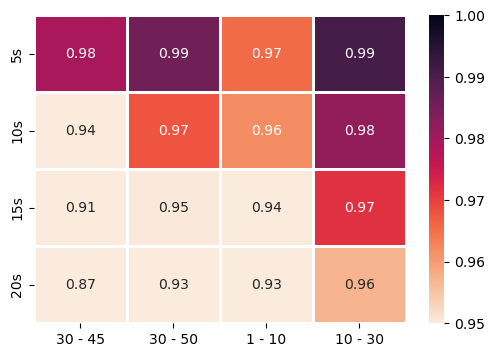

In [31]:
import seaborn

plt.figure(figsize=(6, 4))
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(R2_all_finalN,columns=['30 - 45', '30 - 50','1 - 10','10 - 30'], index=['5s','10s','15s', '20s'])
seaborn.heatmap(data_s,  annot=True, cmap='rocket_r', fmt='.2f', linewidths=1, vmin=0.95, vmax=1.0)


data_s.to_csv('/home/b1044271/Columbia/Plots/raw_data.csv', index=False)
#plt.savefig('/home/b1044271/Columbia/Plots/NOV23/Sensitivity_Narrow_Knee_R2.svg')

## Exponent matrix

In [33]:
# now we can mean over regions 
E_WN = np.nanmean(W_ExpN,0)
E_N2N = np.nanmean(N2_ExpN,0)
E_N3N = np.nanmean(N3_ExpN,0)
E_RN = np.nanmean(R_ExpN,0)

E_allN = np.nanmean([E_WN , E_N2N , E_N3N , E_RN], 0)

E_all_finalN = np.reshape(E_allN, (4, 4))

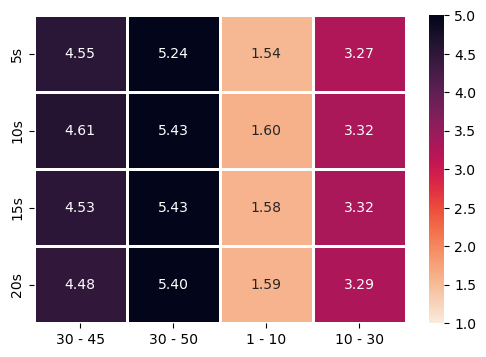

In [37]:
import seaborn

plt.figure(figsize=(6, 4))
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(E_all_finalN,columns=['30 - 45', '30 - 50','1 - 10','10 - 30'], index=['5s','10s','15s', '20s'])
seaborn.heatmap(data_s,  annot=True, cmap='rocket_r', fmt='.2f', linewidths=1, vmin=1, vmax=5)

plt.savefig('/home/b1044271/Columbia/Plots/NOV23/Sensitivity_Narrow_Knee_exponent.svg')

In [106]:
# now we can mean over regions 
R2_WFN = np.nanmean(W_R2FN,0)
R2_N2FN = np.nanmean(N2_R2FN,0)
R2_N3FN = np.nanmean(N3_R2FN,0)
R2_RFN = np.nanmean(R_R2FN,0)

R2_allFN = np.nanmean([R2_WFN , R2_N2FN , R2_N3FN , R2_RFN], 0)

R2_all_finalFN = np.reshape(R2_allFN, (4, 4))

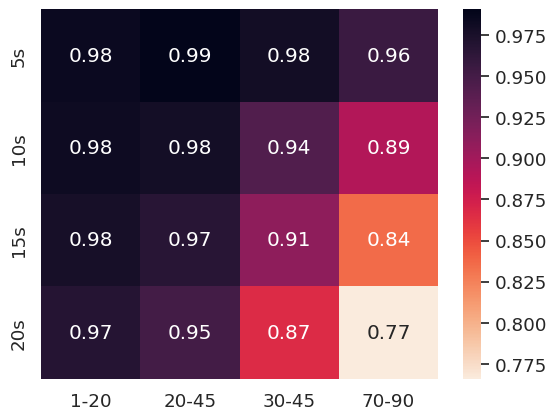

In [253]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(R2_all_finalFN,columns=['1-20', '20-45','30-45','30-55'], index=['5s','10s','15s', '20s'])
seaborn.heatmap(data_s,  annot=True, cmap='rocket_r', fmt='.2f', linewidths=2, square=True)

plt.savefig("iEEG_sensitivity.svg")

In [78]:
# now we can mean over regions 
Exp_WN = np.nanmean(W_ExpN,0)
Exp_N2N = np.nanmean(N2_ExpN,0)
Exp_N3N = np.nanmean(N3_ExpN,0)
Exp_RN = np.nanmean(R_ExpN,0)

Exp_allN = np.nanmean([Exp_WN , Exp_N2N , Exp_N3N , Exp_RN], 0)

Exp_all_finalN = np.reshape(Exp_allN, (4, 4))

# Comparing Broadband vs Narrowband


In [211]:
np.shape(np.repeat(['30_t5','45_t5','70_t5','100_t5','30_t10','45_t10','70_t10','100_t10','30_t15','45_t15','70_t15','100_t15','30_t20','45_t20','70_t20','100_t20'], 8, axis=0))

(128,)

<AxesSubplot: xlabel='range', ylabel='exponent'>

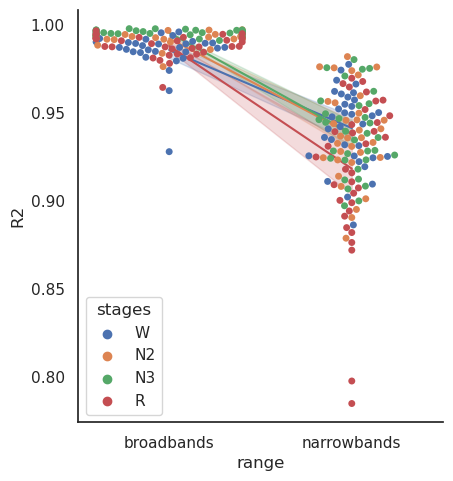

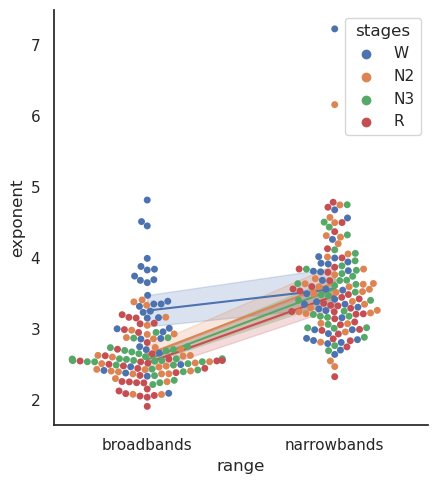

In [273]:
array_list_B = [np.nanmean(W_R2,1), np.nanmean(N2_R2,1) , np.nanmean(N3_R2,1), np.nanmean(R_R2,1)]
array_list_N = [np.nanmean(W_R2N,1), np.nanmean(N2_R2N,1) , np.nanmean(N3_R2N,1), np.nanmean(R_R2N,1)]
R2_list = np.hstack([np.hstack(array_list_B) , np.hstack(array_list_N)])

Exp_list_B = [np.nanmean(W_Exp,1), np.nanmean(N2_Exp,1) , np.nanmean(N3_Exp,1), np.nanmean(R_Exp,1)]
Exp_list_N = [np.nanmean(W_ExpN,1), np.nanmean(N2_ExpN,1) , np.nanmean(N3_ExpN,1), np.nanmean(R_ExpN,1)]
Exp_list = np.hstack([np.hstack(Exp_list_B) , np.hstack(Exp_list_N)])

data = {'R2' : R2_list, 'exponent' :Exp_list, 'stages' : np.repeat(['W','N2','N3','R','W','N2','N3','R'], 34, axis=0), 
        'regions' : np.repeat(np.arange(34), 8, axis=0), 'range': np.repeat(['broadbands','narrowbands'], 34*4, axis=0)}


df1 = pd.DataFrame(data)
seaborn.set(style='white')
seaborn.relplot(x='range', y='R2', hue='stages',  kind='line',  zorder=4, data=df1,legend=False)
seaborn.swarmplot(x='range', y='R2', hue='stages',  zorder=4, data=df1)
#plt.plot([R2_list[0:136], R2_list[136:272]], color = 'grey', linewidth = 0.5, linestyle = '-');
#seaborn.pointplot(x='Range', y='R2', hue='Stages', data=df1, dodge=0.6, ci=None, markers='')
seaborn.relplot(x='range', y='exponent', hue='stages',  kind='line',  zorder=4, data=df1,legend=False)
seaborn.swarmplot(x='range', y='exponent', hue='stages',  zorder=4, data=df1)

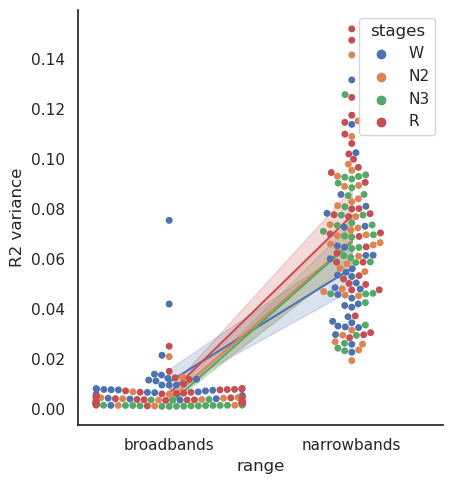

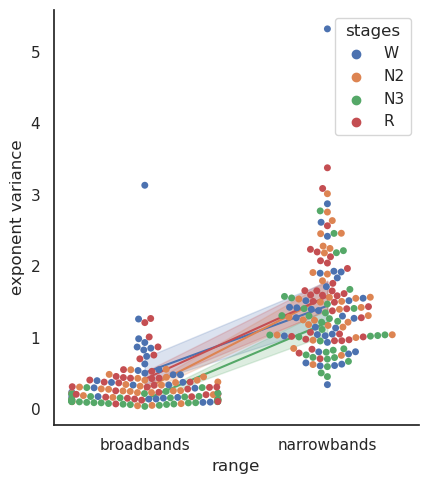

In [263]:
array_list_B = [np.nanstd(W_R2,1), np.nanstd(N2_R2,1) , np.nanstd(N3_R2,1), np.nanstd(R_R2,1)]
array_list_N = [np.nanstd(W_R2N,1), np.nanstd(N2_R2N,1) , np.nanstd(N3_R2N,1), np.nanstd(R_R2N,1)]
R2_list = np.hstack([np.hstack(array_list_B) , np.hstack(array_list_N)])

Exp_list_B = [np.nanstd(W_Exp,1), np.nanstd(N2_Exp,1) , np.nanstd(N3_Exp,1), np.nanstd(R_Exp,1)]
Exp_list_N = [np.nanstd(W_ExpN,1), np.nanstd(N2_ExpN,1) , np.nanstd(N3_ExpN,1), np.nanstd(R_ExpN,1)]
Exp_list = np.hstack([np.hstack(Exp_list_B) , np.hstack(Exp_list_N)])

data = {'R2 variance' : R2_list, 'exponent variance' :Exp_list, 'stages' : np.repeat(['W','N2','N3','R','W','N2','N3','R'], 34, axis=0), 
        'regions' : np.repeat(np.arange(34), 8, axis=0), 'range': np.repeat(['broadbands','narrowbands'], 34*4, axis=0)}


df1 = pd.DataFrame(data)
seaborn.set(style='white')
seaborn.relplot(x='range', y='R2 variance', hue='stages',  kind='line',  zorder=4, data=df1,legend=False)
seaborn.swarmplot(x='range', y='R2 variance', hue='stages',  zorder=4, data=df1)
plt.savefig("R2_variance_Broad_Narrow.svg")

#plt.plot([R2_list[0:136], R2_list[136:272]], color = 'grey', linewidth = 0.5, linestyle = '-');
#seaborn.pointplot(x='Range', y='R2', hue='Stages', data=df1, dodge=0.6, ci=None, markers='')
seaborn.relplot(x='range', y='exponent variance', hue='stages',  kind='line',  zorder=4, data=df1,legend=False)
seaborn.swarmplot(x='range', y='exponent variance', hue='stages',  zorder=4, data=df1)
plt.savefig("Exp_variance_Broad_Narrow.svg")


Using Spearman correlation
Correlation: -0.5867331604796331
P-value: 1.491340490275536e-26


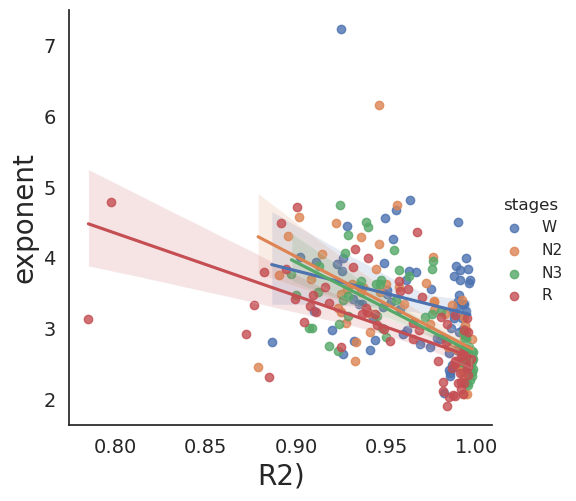

In [276]:
perform_correlation(R2_list,Exp_list)
# PLOT correlations 
seaborn.lmplot(x="R2", y="exponent", hue="stages", data=df1);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('exponent',fontsize=20)
plt.xlabel('R2)',fontsize=20)

plt.savefig("Corr_R2_Exp_Broad_Knee.svg")

# PLOT Diff betwn Knee and No Knee (Exp and R2)

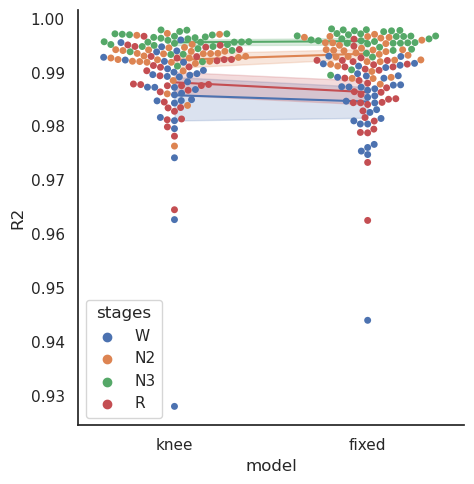

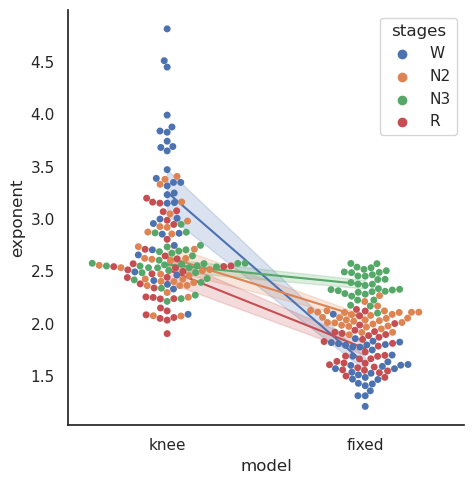

In [266]:
array_list_Knee = [np.nanmean(W_R2,1), np.nanmean(N2_R2,1) , np.nanmean(N3_R2,1), np.nanmean(R_R2,1)]
array_list_NoKnee = [np.nanmean(W_R2F,1), np.nanmean(N2_R2F,1) , np.nanmean(N3_R2F,1), np.nanmean(R_R2F,1)]

R2_list = np.hstack([np.hstack(array_list_Knee) , np.hstack(array_list_NoKnee)])

Exp_list_Knee = [np.nanmean(W_Exp,1), np.nanmean(N2_Exp,1) , np.nanmean(N3_Exp,1), np.nanmean(R_Exp,1)]
Exp_list_NoKnee = [np.nanmean(W_ExpF,1), np.nanmean(N2_ExpF,1) , np.nanmean(N3_ExpF,1), np.nanmean(R_ExpF,1)]

Exp_list = np.hstack([np.hstack(Exp_list_Knee) , np.hstack(Exp_list_NoKnee)])

data = {'R2' : R2_list, 'exponent' :Exp_list, 'stages' : np.repeat(['W','N2','N3','R','W','N2','N3','R'], 34, axis=0), 
        'regions' : np.repeat(np.arange(34), 8, axis=0), 'model': np.repeat(['knee','fixed'], 34*4, axis=0)}


df_K = pd.DataFrame(data)#
seaborn.set(style='white')
seaborn.relplot(x='model', y='R2', hue='stages',  kind='line',  zorder=4, data=df_K,legend=False)
seaborn.swarmplot(x='model', y='R2', hue='stages',  zorder=4, data=df_K)
plt.savefig("R2_Knee_NoKnee_Broad.svg")

seaborn.relplot(x='model', y='exponent', hue='stages',  kind='line',  zorder=4, data=df_K,legend=False)
seaborn.swarmplot(x='model', y='exponent', hue='stages',  zorder=4, data=df_K)
plt.savefig("Exp_Knee_NoKnee_broad.svg")

<AxesSubplot: xlabel='model', ylabel='exponent'>

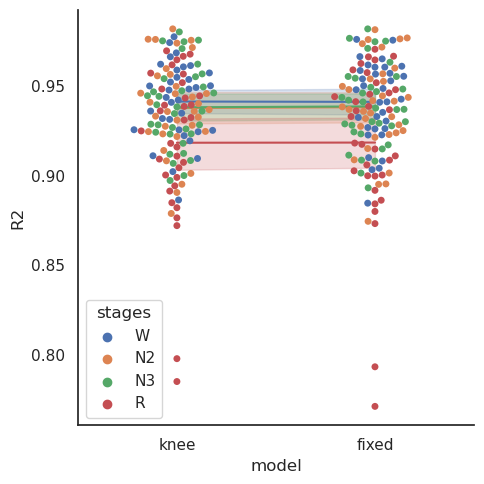

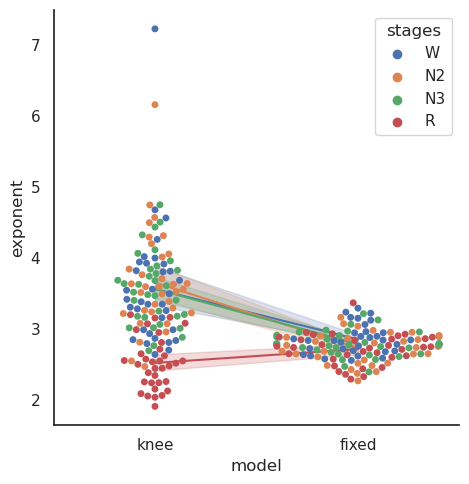

In [267]:
array_list_KneeN = [np.nanmean(W_R2N,1), np.nanmean(N2_R2N,1) , np.nanmean(N3_R2N,1), np.nanmean(R_R2N,1)]
array_list_NoKneeN = [np.nanmean(W_R2FN,1), np.nanmean(N2_R2FN,1) , np.nanmean(N3_R2FN,1), np.nanmean(R_R2FN,1)]

R2_listN = np.hstack([np.hstack(array_list_KneeN) , np.hstack(array_list_NoKneeN)])

Exp_list_KneeN = [np.nanmean(W_ExpN,1), np.nanmean(N2_ExpN,1) , np.nanmean(N3_ExpN,1), np.nanmean(R_Exp,1)]
Exp_list_NoKneeN = [np.nanmean(W_ExpFN,1), np.nanmean(N2_ExpFN,1) , np.nanmean(N3_ExpFN,1), np.nanmean(R_ExpFN,1)]

Exp_listN = np.hstack([np.hstack(Exp_list_KneeN) , np.hstack(Exp_list_NoKneeN)])

data = {'R2' : R2_listN, 'exponent' :Exp_listN, 'stages' : np.repeat(['W','N2','N3','R','W','N2','N3','R'], 34, axis=0), 
        'regions' : np.repeat(np.arange(34), 8, axis=0), 'model': np.repeat(['knee','fixed'], 34*4, axis=0)}


df_K = pd.DataFrame(data)
seaborn.set(style='white')
seaborn.relplot(x='model', y='R2', hue='stages',  kind='line',  zorder=4, data=df_K,legend=False)
seaborn.swarmplot(x='model', y='R2', hue='stages',  zorder=4, data=df_K)
#plt.savefig("R2_Knee_NoKnee_Broad.svg")

seaborn.relplot(x='model', y='exponent', hue='stages',  kind='line',  zorder=4, data=df_K,legend=False)
seaborn.swarmplot(x='model', y='exponent', hue='stages',  zorder=4, data=df_K)
#plt.savefig("Exp_Knee_NoKnee_broad.svg")

In [277]:
np.mean(array_list_KneeN)

0.9339823212876144

In [ ]:
np.mean(array_list_KneeN)